# Figure s1_0

In [1]:
import os
import gc
import glob
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # Make sure to install tqdm if you haven't (pip install tqdm)

# Specify the directory where CSV files are located
results_directory = "../Results/Summary/"

# Use os.path.join for path construction
csv_files = glob.glob(os.path.join(results_directory, '*_summary_MI_func.csv'))

# Use tqdm to add a progress bar during concatenation
dfs = []
for csv_file in tqdm(csv_files, desc='Reading CSV files', unit='file'):
    df = pd.read_csv(csv_file, index_col=[0])
    dfs.append(df)

# Concatenate all DataFrames into one
df = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
df.head()


Reading CSV files: 100%|██████████| 6/6 [00:01<00:00,  3.35file/s]


,index,Gene,Pearson correlation,PCC_PValue,Spearmanr correlation,SPC_PValue,SSIM_Score,Cosine_Score,Moran'I_Score,Slides,Dataset,Method
0,0,FYB1,0.037944,3.703762e-03,0.073832,9.137931e-08,0.003988,0.133517,0.048471,C73_C1_VISIUM,Liver_visium,hist2st
1,1,MME,0.248987,1.493047e-71,0.303691,4.709541e-107,0.116664,0.552686,0.250680,C73_C1_VISIUM,Liver_visium,hist2st
2,2,CKAP5,0.082806,2.426433e-09,0.106306,2.710782e-14,0.006528,0.213023,0.080914,C73_C1_VISIUM,Liver_visium,hist2st
3,3,MAP2K1,0.291781,1.266866e-98,0.336820,1.148629e-132,0.138727,0.605552,0.289929,C73_C1_VISIUM,Liver_visium,hist2st
4,4,CAST,0.179371,1.397628e-37,0.254622,7.741252e-75,0.065898,0.526105,0.173970,C73_C1_VISIUM,Liver_visium,hist2st


## Group analysis

In [5]:
# df.groupby(["Method", "Dataset"]).agg({
#     "Pearson correlation": ["median", "mean", "min", "max", "std"]
# }).sort_values(by=("Pearson correlation", "median"), ascending=False).sort_index(level=0)


In [4]:
# df.groupby(["Method", "Dataset"]).agg({
#     "Moran'I_Score": ["median", "mean", "min", "max", "std"]
# }).sort_values(by=("Moran'I_Score", "median"), ascending=False).sort_index(level=0)

## Visualization

In [6]:
# Define mapping dictionaries for model and dataset names
model_mapping = {
    'deeppt': "DeepPT",
    'histogene': "HisToGene",
    'His2gene': "HisToGene",
    'stnet': "STnet",
    'hist2st': "Hist2ST",
    'stimage': "STimage",
    'bleep': "BLEEP",
    'deepspace': "DeepSpaCE"
}

dataset_mapping = {
    'SCC_Chenhao': "Skin_Melanoma",
    'Skin_cscc': "Skin_cSCC",
    'Liver_bleep': "Liver_Visium",
    'Liver_visium': "Liver_Visium",
    'BC_visium': "BC_Visium",
    'Kidney_visium': "Kidney_Visium"
}

# Replace model and dataset names in the DataFrame
df.replace({'Method': model_mapping, 'Dataset': dataset_mapping}, inplace=True)

# Define the order for Dataset and Method columns
dataset_order = ['BC_Her2ST', 'BC_Visium', 'Skin_cSCC', 'Skin_Melanoma', 'Kidney_Visium', 'Liver_Visium']
method_order = ['STnet', 'HisToGene', 'Hist2ST', 'DeepSpaCE', 'STimage', 'BLEEP', 'DeepPT']

# Use pd.Categorical directly during DataFrame creation
df['Dataset'] = pd.Categorical(df['Dataset'], categories=dataset_order, ordered=True)
df['Method'] = pd.Categorical(df['Method'], categories=method_order, ordered=True)


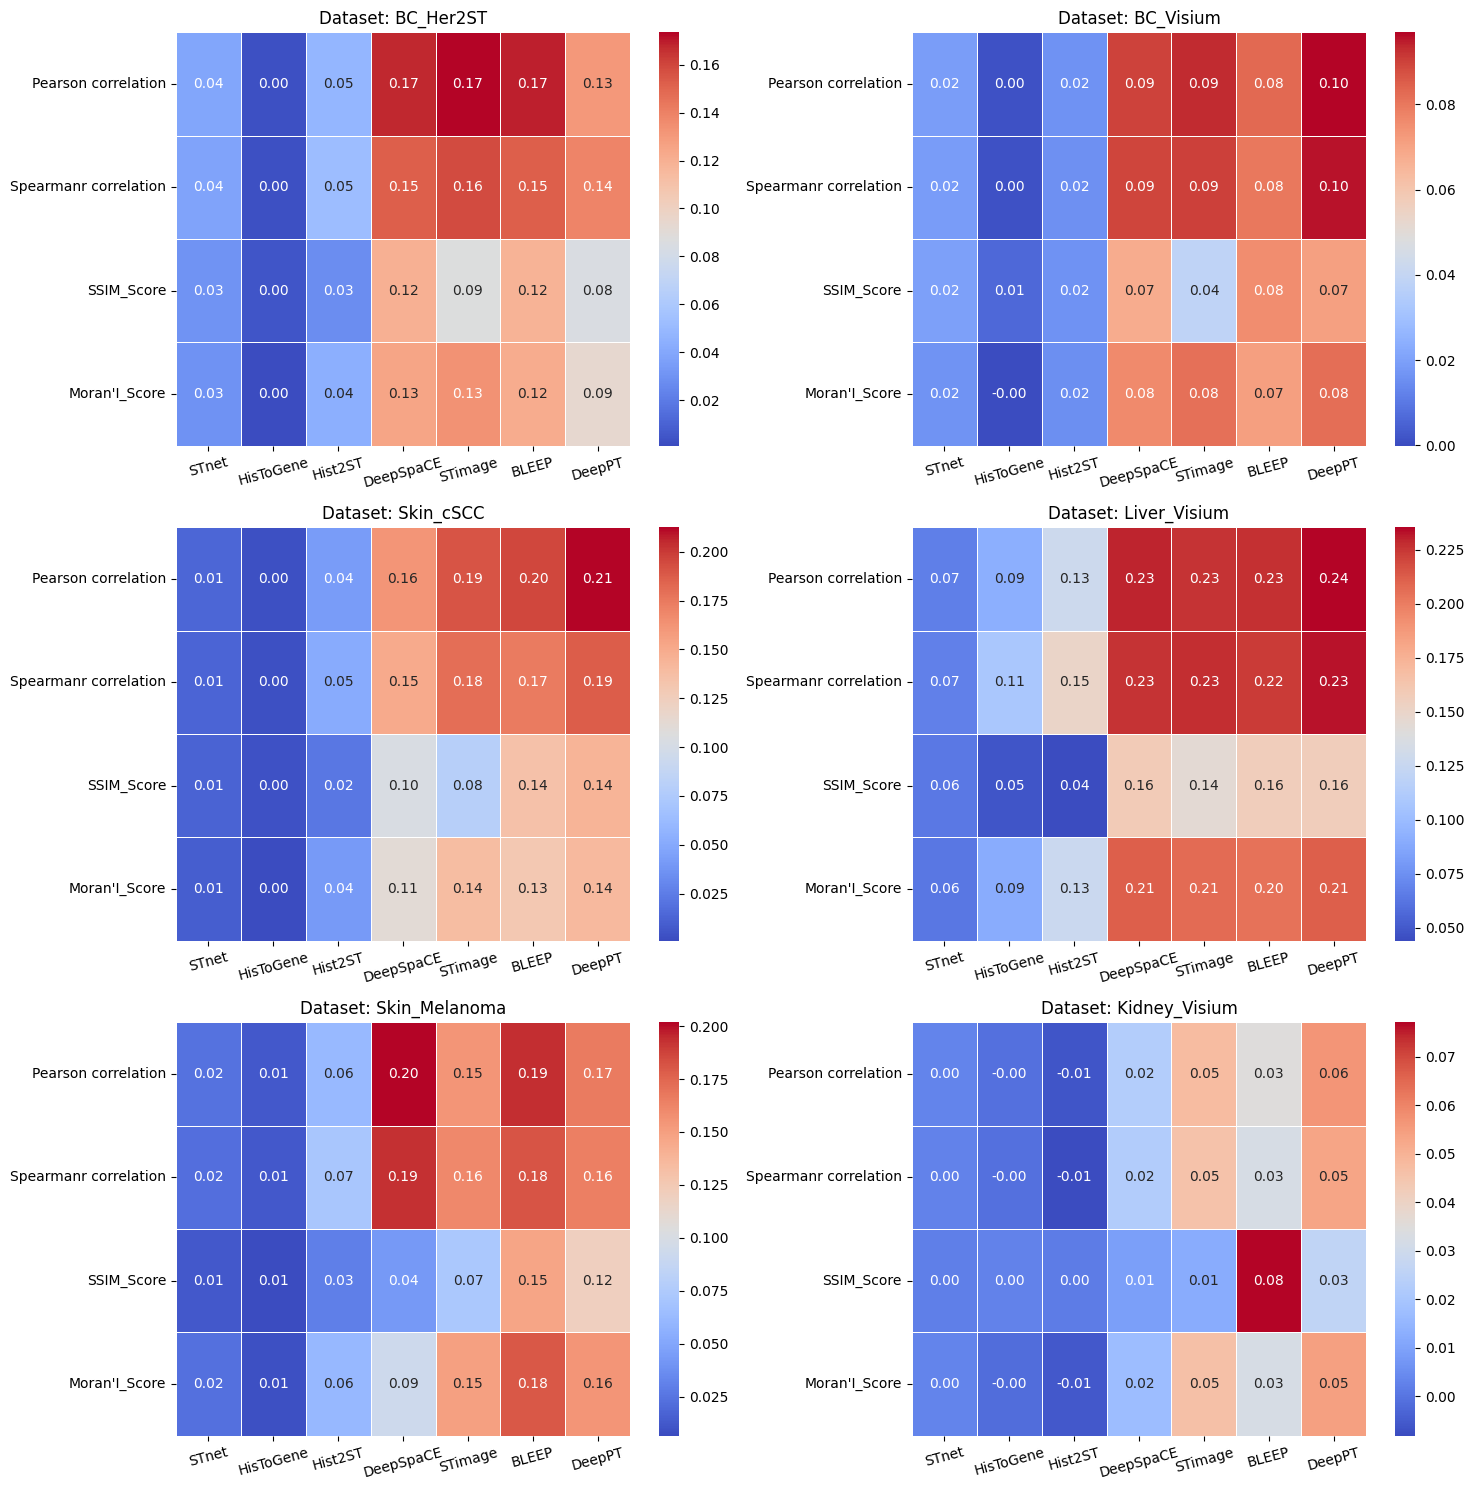

7

In [7]:
# List of dataset names
dataset_names = ['BC_Her2ST', 'BC_Visium', 'Skin_cSCC', 'Liver_Visium', 'Skin_Melanoma', 'Kidney_Visium']

columns_to_visualize = ['Pearson correlation', 'Spearmanr correlation', 'SSIM_Score', "Moran'I_Score"]

# Specify the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over each dataset
for i, dataset_name in enumerate(dataset_names):
    # Filter data for the current dataset
    df_subset = df[df["Dataset"] == dataset_name]

    # Group by 'Method' and calculate mean for specified columns
    grouped_data = df_subset.groupby('Method').agg({
        'Pearson correlation': 'mean',
        'Spearmanr correlation': 'mean',
        'SSIM_Score': 'mean',
        'Cosine_Score': 'mean',
        "Moran'I_Score": 'mean'
    })

    # Specify the row and column index for the current subplot
    row_index = i // num_cols
    col_index = i % num_cols

    # Create a heatmap in the current subplot
    sns.heatmap(grouped_data[columns_to_visualize].T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=axes[row_index, col_index])

    # Set plot labels and title for the current subplot
    axes[row_index, col_index].set_title(f'Dataset: {dataset_name}')
    axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=15) 
    axes[row_index, col_index].set_xlabel('')
    axes[row_index, col_index].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.savefig("Figure_S4.pdf")
plt.show()
gc.collect()


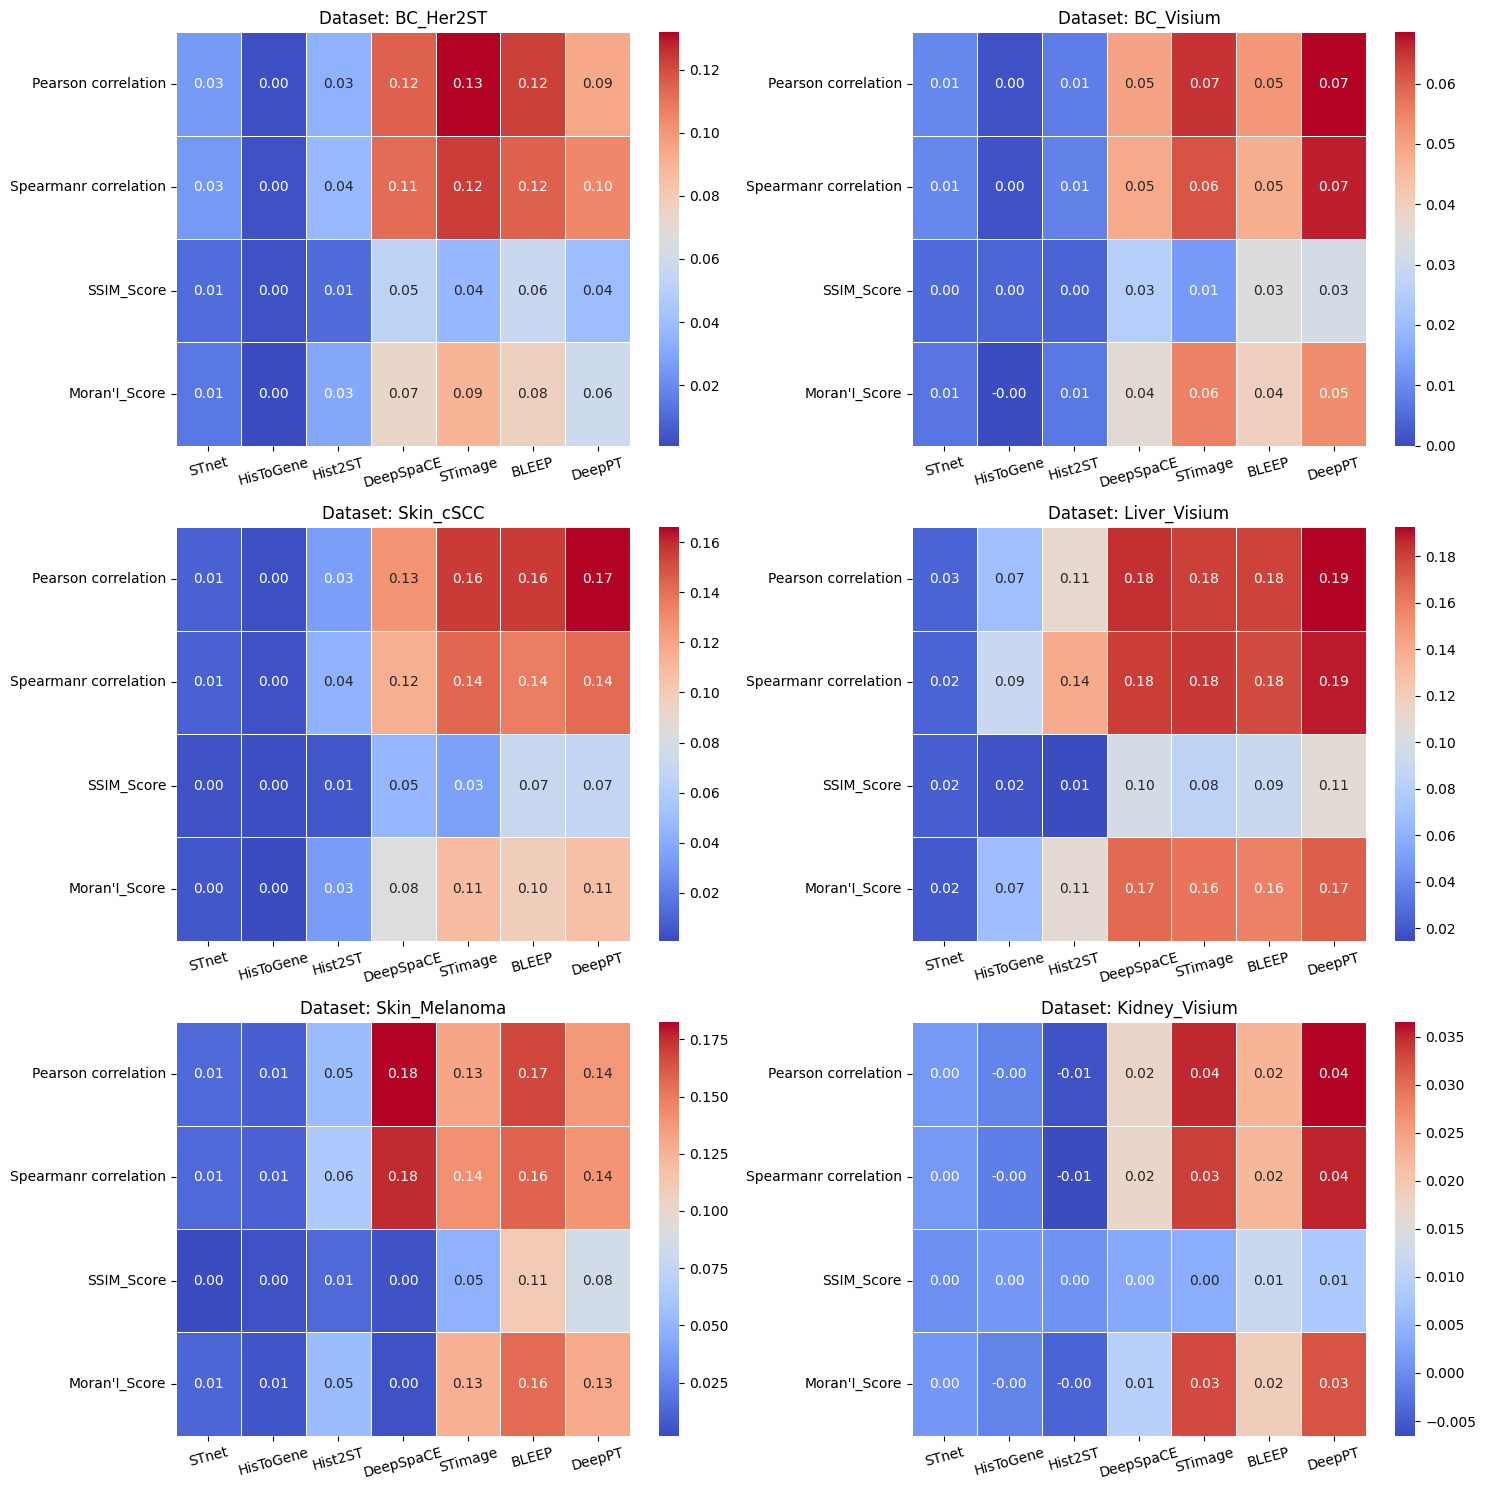

43715

In [9]:
# List of dataset names
dataset_names = ['BC_Her2ST', 'BC_Visium', 'Skin_cSCC', 'Liver_Visium', 'Skin_Melanoma', 'Kidney_Visium']

columns_to_visualize = ['Pearson correlation', 'Spearmanr correlation', 'SSIM_Score', "Moran'I_Score"]

# Specify the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over each dataset
for i, dataset_name in enumerate(dataset_names):
    # Filter data for the current dataset
    df_subset = df[df["Dataset"] == dataset_name]

    # Group by 'Method' and calculate mean for specified columns
    grouped_data = df_subset.groupby('Method').agg({
        'Pearson correlation': 'median',
        'Spearmanr correlation': 'median',
        'SSIM_Score': 'median',
        'Cosine_Score': 'median',
        "Moran'I_Score": 'median'
    })

    # Specify the row and column index for the current subplot
    row_index = i // num_cols
    col_index = i % num_cols

    # Create a heatmap in the current subplot
    sns.heatmap(grouped_data[columns_to_visualize].T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=axes[row_index, col_index])

    # Set plot labels and title for the current subplot
    axes[row_index, col_index].set_title(f'Dataset: {dataset_name}')
    axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=15) 
    axes[row_index, col_index].set_xlabel('')
    axes[row_index, col_index].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.savefig("Figure_S5.pdf")
plt.show()
gc.collect()


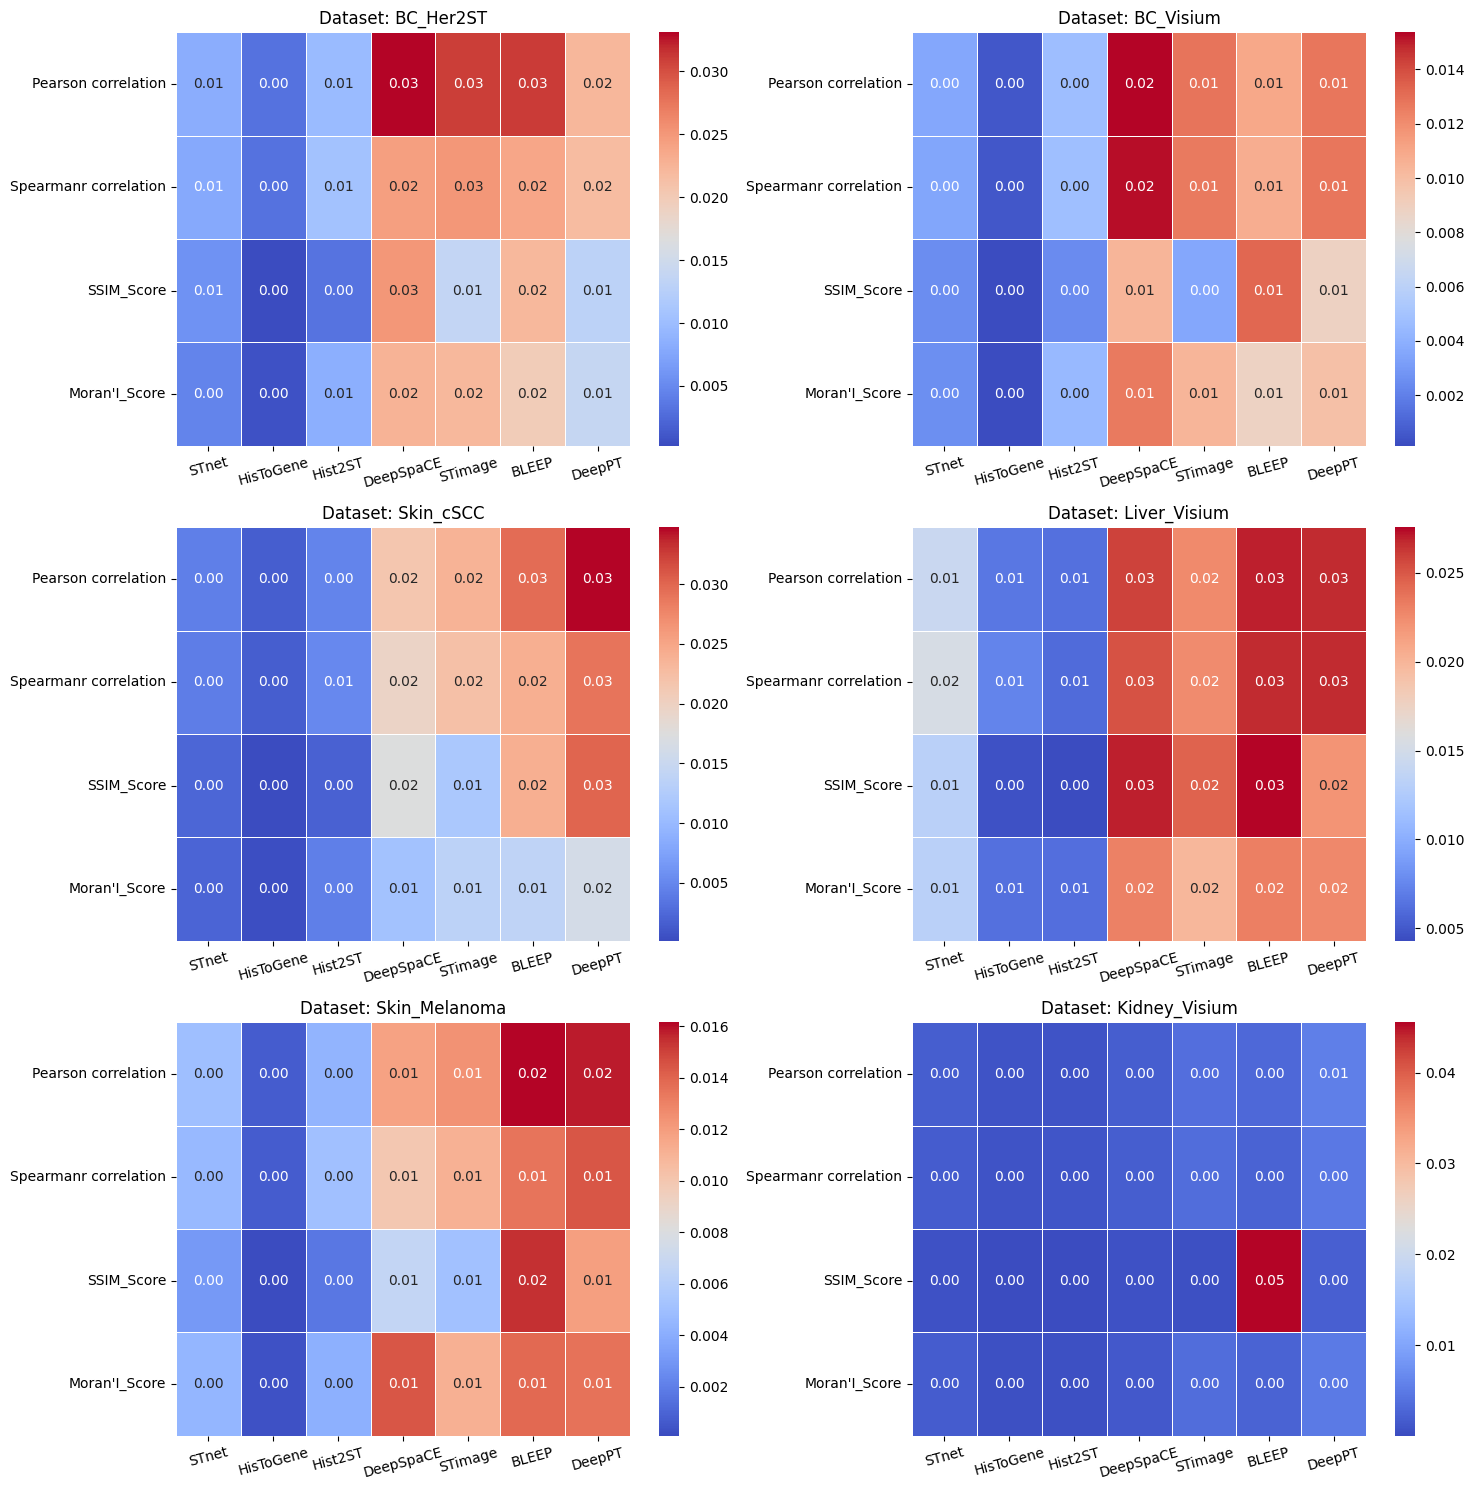

44602

In [8]:
# List of dataset names
dataset_names = ['BC_Her2ST', 'BC_Visium', 'Skin_cSCC', 'Liver_Visium', 'Skin_Melanoma', 'Kidney_Visium']

columns_to_visualize = ['Pearson correlation', 'Spearmanr correlation', 'SSIM_Score', "Moran'I_Score"]

# Specify the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over each dataset
for i, dataset_name in enumerate(dataset_names):
    # Filter data for the current dataset
    df_subset = df[df["Dataset"] == dataset_name]

    # Group by 'Method' and calculate mean for specified columns
    grouped_data = df_subset.groupby('Method').agg({
        'Pearson correlation': 'var',
        'Spearmanr correlation': 'var',
        'SSIM_Score': 'var',
        'Cosine_Score': 'var',
        "Moran'I_Score": 'var'
    })

    # Specify the row and column index for the current subplot
    row_index = i // num_cols
    col_index = i % num_cols

    # Create a heatmap in the current subplot
    sns.heatmap(grouped_data[columns_to_visualize].T, annot=True, cmap="coolwarm",fmt=".2f", linewidths=.5, ax=axes[row_index, col_index])

    # Set plot labels and title for the current subplot
    axes[row_index, col_index].set_title(f'Dataset: {dataset_name}')
    axes[row_index, col_index].set_xticklabels(axes[row_index, col_index].get_xticklabels(), rotation=15) 
    axes[row_index, col_index].set_xlabel('')
    axes[row_index, col_index].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.savefig("Figure_S6.pdf")
plt.show()
gc.collect()
